In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

This Notebook highlights which neighborhoods are safe depending on two factors:
- The number of cars counted during specific studies
- The percent of drivers in those studies who exceeded the speet limit

In [13]:
#Read in data
data = pd.read_csv("traffic_data.csv")
data = data.dropna(subset=['average_daily_car_traffic']) #eliminate the bike study from the data
#Show data
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 0 to 412
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   _id                         286 non-null    int64  
 1   id                          286 non-null    int64  
 2   device_id                   286 non-null    int64  
 3   record_oid                  286 non-null    float64
 4   count_start_date            284 non-null    object 
 5   count_end_date              283 non-null    object 
 6   average_daily_car_traffic   286 non-null    float64
 7   average_daily_bike_traffic  0 non-null      float64
 8   counter_number              219 non-null    object 
 9   counter_type                285 non-null    object 
 10  speed_limit                 222 non-null    float64
 11  max_speed                   80 non-null     float64
 12  median_speed                282 non-null    float64
 13  percent_over_limit          225 non-null

,_id,id,device_id,record_oid,average_daily_car_traffic,average_daily_bike_traffic,speed_limit,max_speed,median_speed,percent_over_limit,speed85_percent,speed95_percent,longitude,latitude,council_district,ward,tract,public_works_division,pli_division,police_zone
count,286.000000,2.860000e+02,286.000000,2.860000e+02,286.000000,0.0,222.000000,80.000000,282.000000,225.000000,285.000000,276.000000,285.000000,285.000000,285.000000,285.000000,2.860000e+02,285.000000,285.000000,285.000000
mean,438.793706,1.065029e+09,224.115385,1.069451e+09,3275.080420,NaN,25.315315,59.037500,25.924823,50.048889,30.672632,34.504529,-79.961426,40.449149,5.614035,15.210526,4.200320e+10,2.673684,15.210526,3.642105
std,392.316811,6.076272e+08,121.343954,6.296037e+08,3145.750272,NaN,2.049090,14.428737,5.140941,30.321673,5.438920,6.707886,0.046764,0.024113,2.583496,7.279473,1.672158e+05,1.346164,7.279473,1.591676
min,1.000000,5.216219e+06,1.000000,6.129295e+06,23.000000,NaN,15.000000,20.000000,14.000000,0.000000,17.000000,19.800000,-80.073656,40.372514,1.000000,1.000000,4.200301e+10,1.000000,1.000000,1.000000
25%,112.500000,5.682059e+08,111.250000,5.382450e+08,766.500000,NaN,25.000000,50.500000,22.000000,22.000000,27.000000,31.000000,-80.009285,40.435829,4.000000,10.000000,4.200311e+10,2.000000,10.000000,2.000000
50%,302.500000,1.021682e+09,237.500000,1.085759e+09,2312.500000,NaN,25.000000,59.000000,26.000000,49.000000,30.000000,34.000000,-79.947801,40.454166,6.000000,14.000000,4.200314e+10,2.000000,14.000000,4.000000
75%,695.750000,1.603481e+09,321.750000,1.591836e+09,5248.750000,NaN,25.000000,67.000000,29.000000,78.000000,34.000000,38.000000,-79.922844,40.464906,8.000000,20.000000,4.200325e+10,3.000000,20.000000,5.000000
max,1390.000000,2.147461e+09,431.000000,2.138414e+09,16729.000000,NaN,35.000000,103.000000,43.000000,98.000000,50.000000,95.000000,-79.869628,40.494423,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000


In [14]:
#All neighborhoods
data['neighborhood'].sort_values(ascending=True).unique()

array(['Allegheny Center', 'Allegheny West', 'Arlington', 'Beechview',
       'Beltzhoover', 'Bloomfield', 'Bluff', 'Brighton Heights',
       'Brookline', 'California-Kirkbride', 'Carrick',
       'Central Business District', 'Central Lawrenceville',
       'Central Northside', 'Central Oakland', 'Chartiers City',
       'Crafton Heights', 'Duquesne Heights', 'East Allegheny',
       'East Hills', 'East Liberty', 'Elliott', 'Fineview', 'Friendship',
       'Greenfield', 'Hazelwood', 'Highland Park', 'Homewood North',
       'Homewood South', 'Knoxville', 'Larimer', 'Lincoln Place',
       'Lincoln-Lemington-Belmar', 'Lower Lawrenceville', 'Manchester',
       'Marshall-Shadeland', 'Morningside', 'Mount Washington',
       'New Homestead', 'North Oakland', 'North Shore', 'Overbrook',
       'Perry North', 'Perry South', 'Point Breeze', 'Point Breeze North',
       'Polish Hill', 'Regent Square', 'Shadyside', 'Sheraden',
       'South Side Flats', 'South Side Slopes', 'Spring Garden',
 

In [15]:
#Some neighborhoods have more studies done than others.
#To eliminate this factor, we need to take the mean
#of all the studies done per neighborhood
trafficData = data.groupby('neighborhood')['average_daily_car_traffic'].mean().sort_values(ascending=True)
#Show average traffic data per neighborhood
print(trafficData.to_string())

neighborhood
South Side Flats               115.000000
Lincoln Place                  126.000000
Lincoln-Lemington-Belmar       195.000000
Fineview                       419.000000
Allegheny West                 477.000000
New Homestead                  666.000000
Overbrook                      777.000000
Summer Hill                    937.000000
Upper Hill                     953.333333
Central Northside             1189.000000
Spring Garden                 1226.000000
Hazelwood                     1289.500000
Spring Hill-City View         1293.000000
Elliott                       1342.666667
Beechview                     1418.333333
Windgap                       1531.000000
Highland Park                 1564.733333
Beltzhoover                   1577.000000
Lower Lawrenceville           1736.000000
Bluff                         1788.333333
East Allegheny                1924.000000
Carrick                       1969.571429
Morningside                   2049.285714
Perry North          

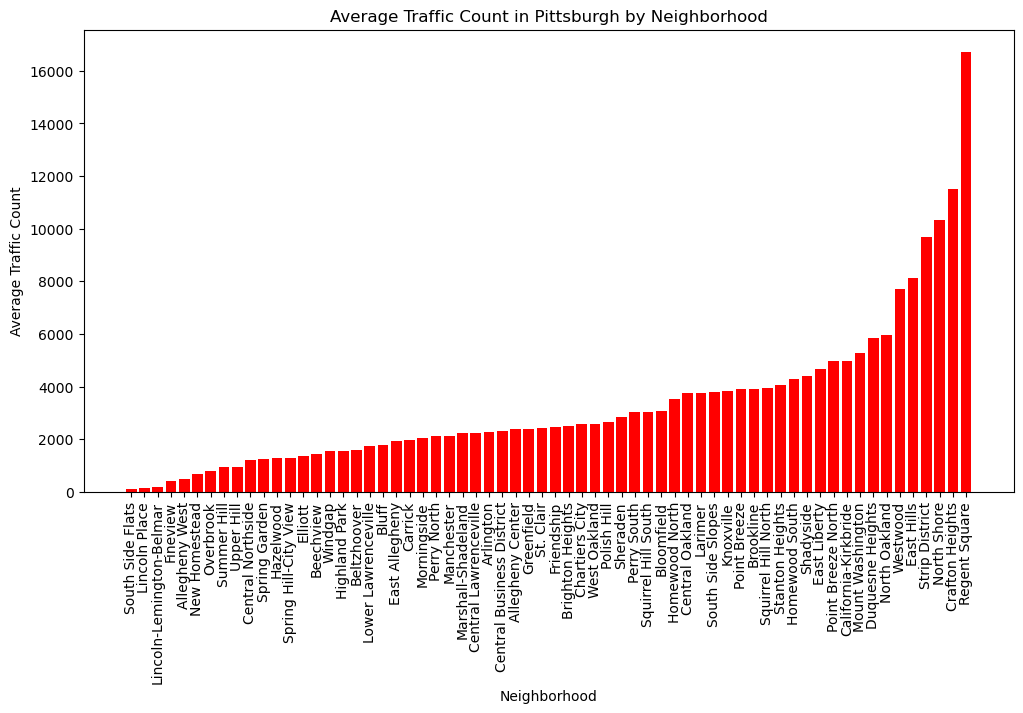

In [16]:
#Bar chart
plt.figure(figsize=(12,6))
plt.bar(trafficData.index, trafficData.values, color='red')
plt.xticks(rotation=90)
plt.title("Average Traffic Count in Pittsburgh by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Traffic Count")
plt.show()

In [17]:
#Beginning of the graph that shows the percent of
#cars that went over the limit in each neighborhood
df = data.groupby('neighborhood')['percent_over_limit'].mean().sort_values(ascending=True)
#Visuals of the specific values
print(speedOverLimit.to_string())

neighborhood
South Side Flats              3.000000
Central Business District     6.000000
Allegheny West               11.000000
Lincoln Place                14.000000
Bluff                        14.666667
Central Northside            18.400000
Central Lawrenceville        18.500000
Lincoln-Lemington-Belmar     19.000000
Upper Hill                   24.333333
Bloomfield                   24.750000
Knoxville                    25.000000
Central Oakland              25.666667
Perry South                  25.666667
West Oakland                 28.000000
Spring Hill-City View        30.500000
Highland Park                32.000000
Marshall-Shadeland           34.750000
Windgap                      36.500000
East Allegheny               38.000000
New Homestead                39.000000
Manchester                   40.111111
Lower Lawrenceville          42.500000
Polish Hill                  45.000000
Carrick                      45.500000
Shadyside                    46.000000
Fineview    

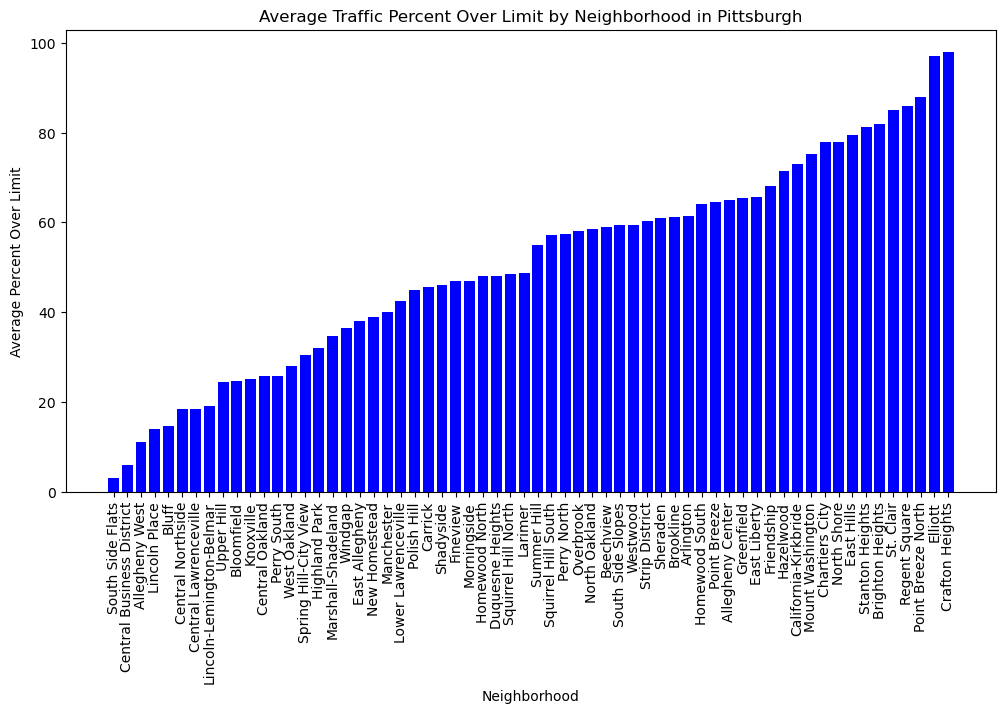

In [18]:
#Plot the bar graph
plt.figure(figsize=(12,6))
plt.bar(speedOverLimit.index, speedOverLimit.values, color='blue')
plt.xticks(rotation=90)
plt.title("Average Traffic Percent Over Limit by Neighborhood in Pittsburgh")
plt.xlabel("Neighborhood")
plt.ylabel("Average Percent Over Limit")
plt.show()

Span of data is 16614.0.

neighborhood
South Side Flats             1.970000
Allegheny West               1.868211
Lincoln Place                1.859338
Central Business District    1.808183
Lincoln-Lemington-Belmar     1.805185
Bluff                        1.752615
Central Northside            1.751356
Upper Hill                   1.706207
Central Lawrenceville        1.686504
Spring Hill-City View        1.624096
Highland Park                1.592740
New Homestead                1.576835
Bloomfield                   1.574118
West Oakland                 1.571330
Perry South                  1.568556
Windgap                      1.549771
Knoxville                    1.526815
Marshall-Shadeland           1.525972
Central Oakland              1.523418
Fineview                     1.511702
East Allegheny               1.511116
Manchester                   1.477648
Lower Lawrenceville          1.477432
Carrick                      1.433373
Morningside                  1.413575
Summer Hill

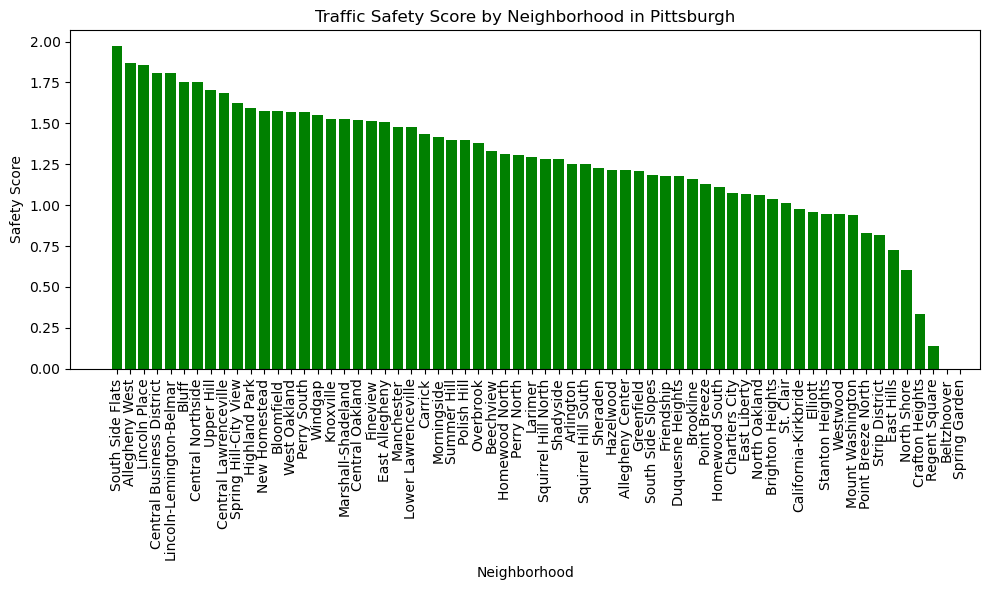

In [19]:
#Begining of the bar chart that adds these two criteria
#together that forms a score for the safety of each
#neighborhood

#The idea is:
    #The higher the score = a safer neighborhood
    #The lower the score = a less safe neighborhood

#Variable for 1st criteria
span = trafficData.max()-trafficData.min()

print("Span of data is " + str(span) +".")
print("")

neighborhood_stats = data.groupby('neighborhood')[['average_daily_car_traffic', 'percent_over_limit']].mean()
neighborhood_stats['safety_score'] = ((100 - speedOverLimit) / 100) + ((trafficData.max() - trafficData)/(span))
neighborhood_stats = neighborhood_stats.sort_values('safety_score', ascending=False)
print(neighborhood_stats['safety_score'].to_string())

plt.figure(figsize=(10,6))
plt.bar(neighborhood_stats.index, neighborhood_stats['safety_score'], color='green')
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Safety Score")
plt.title("Traffic Safety Score by Neighborhood in Pittsburgh")
plt.tight_layout()
plt.show()

### Safety score reasoning
`(100 - percent_over_limit) / 100`
- percent_over_limit is the percentage of cars driving over the speed limit in a neighborhood.
- Subtracting it from 100 flips the percent which means:
    - Low percent means value is near 1 (more safe)
    - High percent means value is near 0 (less safe)
- Dividing by 100 scales it to 0–1, making it easy to combine with the traffic score.
- **Intuition:** The safer neighborhoods with fewer speeders get a higher contribution to the score.

#### Traffic score reasoning
`(trafficData.max() - trafficData)/(span)`
- average_daily_car_traffic is the average number of cars counted per day.
- Since our data runs from an avg of 115 cars all the way to an avg of 16729 cars, 
  we need to determine the span of the set, which is the max minus the min. 
 - span = 16729-115 = 16614
    - Low traffic means the value is near 1 (safer).
    - High traffic means the value near 0 (less safe). 
- **Reasoning:** The neighborhoods with less traffic get a higher contribution to the safety score.

#### Ex of calculation for Morningside
- percent over limit: *47%*
- average traffic: *2049.3*
- **Calculation:** 
    - percent over limit: 100 - 47 = 53 / 100 = `0.53`
    - average traffic: 16729 - 2049.3 / 16614 = `0.88`
    - `.53 + 0.88` is approximately `1.41`

#### Overall: 
- Neighborhoods which are closer to 2 are safer.
- Neighborhoods which are closer to 0 are less safe.